# –ë–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å McCall

In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  
import numpy as np
from numba import jit, float64
from numba.experimental import jitclass
import quantecon as qe
from quantecon.distributions import BetaBinomial
import plotly.express as px

### 1) –í—ã–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö(–ê—Ä—Ö–∞–Ω–≥–µ–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å)

–ò—Å—Ç–æ—á–Ω–∏–∫: https://ourcountryindata.ru/raspredelenie-zarplat-v-rossii/

In [27]:
data = pd.read_excel('C:/Users/Win 10/Downloads/–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞—Ä–ø–ª–∞—Ç.xlsx')

In [28]:
data = data[data['–†–µ–≥–∏–æ–Ω'] == '–ê—Ä—Ö–∞–Ω–≥–µ–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å(–∫—Ä–æ–º–µ –ù–µ–Ω–µ—Ü–∫–æ–≥–æ –∞–≤—Ç–æ–Ω–æ–º–Ω–æ–≥–æ –æ–∫—Ä—É–≥–∞)'].head(10).iloc[[0],:]
data

–†–µ–≥–∏–æ–Ω –û—Ç—Ä–∞—Å–ª—å <11280  \
25  –ê—Ä—Ö–∞–Ω–≥–µ–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å(–∫—Ä–æ–º–µ –ù–µ–Ω–µ—Ü–∫–æ–≥–æ –∞–≤—Ç–æ–Ω–æ–º–Ω...   –í—Å–µ–≥–æ   0.79   

   11280‚Äì12140 12140‚Äì13000 13000‚Äì13850 13850‚Äì14700 14700‚Äì15850 15850‚Äì17000  \
25        0.19        0.27        0.29        0.35        0.46        0.42   

   17000‚Äì18050  ... 33900‚Äì40 40‚Äì45 —Ç—ã—Å. 45‚Äì50 —Ç—ã—Å. 50‚Äì60 —Ç—ã—Å. 60‚Äì75 —Ç—ã—Å.  \
25        0.54  ...    10.87       8.36       6.94      10.14       9.87   

   75‚Äì100 —Ç—ã—Å. 100‚Äì250 —Ç—ã—Å. 250‚Äì500 —Ç—ã—Å. 500—Ç—ã—Å ‚Äì 1 –º–ª–Ω  –°–≤—ã—à–µ 1 –º–ª–Ω  
25        8.65         7.39         0.34            0.04           0  

[1 rows x 30 columns]

In [29]:
data = df1.T.tail(28)
data = data.rename(columns={25: 'p'})
data = data / 100
data = data.reset_index(0).rename(columns={'index': 'w'})
data.head()

w       p
0       <11280  0.0079
1  11280‚Äì12140  0.0019
2  12140‚Äì13000  0.0027
3  13000‚Äì13850  0.0029
4  13850‚Äì14700  0.0035

In [30]:
#c—É–º–º–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –¥–æ–ª–∂–≥–∞ –¥–∞–≤–∞—Ç—å –µ–¥–∏–Ω–∏—Ü—É
np.sum(data['p'])

1.0

In [31]:
x_low = np.array([0,11280,12140,13000, 13850, 14700, 15850, 17000, 18050, 19200, 20350, 21450, 22560, 
                 23690, 24820, 27100, 29300, 31600, 33900, 40000, 45000, 50000, 60000, 75000, 100000,
                 250000, 500000, 1000000])
x_upper = np.append(x_low[1:],1500000)
data['x_low'] = x_low
data['x_upper'] = x_upper
data['x_middle'] = (data['x_upper'] + data['x_low'])/2
data.head()

w       p  x_low  x_upper  x_middle
0       <11280  0.0079      0    11280    5640.0
1  11280‚Äì12140  0.0019  11280    12140   11710.0
2  12140‚Äì13000  0.0027  12140    13000   12570.0
3  13000‚Äì13850  0.0029  13000    13850   13425.0
4  13850‚Äì14700  0.0035  13850    14700   14275.0

In [32]:
fig = px.line(data, x = 'w', y = 'p', markers=True)
fig.update_layout(title='–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–∏—Ç—å —Ç—É –∏–ª–∏ –∏–Ω—É—é –∑–ø')
fig.show()

### 2) –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –±–µ–∑—Ä–∞–±–æ—Ç–∏—Ü—ã

http://www.consultant.ru/law/hotdocs/55695.html/

In [33]:
c = 11280

### 3) –ü–∞—Ä–∞–º–µ—Ç—Ä –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è

https://cbr.ru/hd_base/KeyRate/

In [34]:
#—Å—Ç–∞–≤–∫–∞ —Ü–± –≤ 2019 –≥–æ–¥—É –º–µ–Ω—è–ª–∞—Å—å,–±–µ—Ä–µ–º —Å—Ä–µ–¥–Ω—é—é

r=(7.75+7.5+7.25+7+6.5+6.25)/6
beta=1/(1+r/100)
beta

0.934215648112106

### 4) CRRA —Ñ—É–Ω–∫—Ü–∏—è –ø–æ–ª–µ–∑–Ω–æ—Å—Ç–∏

In [35]:
def u(y, œÉ=2.0):
    if œÉ != 1:
        return (y**(1 - œÉ) - 1) / (1 - œÉ)
    else:
        a = (y**(1 - 1.0001) - 1) / (1 - 1.0001) 
        b = (y**(1 - 0.9999) - 1) / (1 - 0.9999)
        return (a+b)/2

### 5) McCall 1970 —Å –Ω—É–ª–µ–≤–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —É–≤–æ–ª—å–Ω–µ–Ω–∏—è —Ä–∞–±–æ—Ç–Ω–∏–∫–∞

In [36]:
wages = data['x_middle']
probability = data['p']

In [37]:
class McCallModel:

    def __init__(self,Œ± = 0, c=c, Œ≤ = beta, w=wages, q=probability, œÉ = 2.0):
        
        self.Œ± = Œ±
        self.œÉ = œÉ
        self.c, self.Œ≤= c, Œ≤
        self.w, self.q = wages, q
    def update(self, v, d):

        Œ±, Œ≤, c, w, q, œÉ = self.Œ±, self.Œ≤, self.c, self.w, self.q, self.œÉ

        v_new = np.empty_like(v)

        for i in range(len(w)):
            v_new[i] = u(w[i],œÉ) + Œ≤ * ((1 - Œ±) * v[i] + Œ± * d)

        d_new = np.sum(np.maximum(v, u(c,œÉ) + Œ≤ * d) * q)

        return v_new, d_new


In [38]:
def solve_model(mcm, tol=1e-5, max_iter=2000, œÉ = 2.0):

    v = np.ones_like(mcm.w)    
    d = 1                      
    i = 0
    error = tol + 1

    while error > tol and i < max_iter:
        v_new, d_new = mcm.update(v, d)
        error_1 = np.max(np.abs(v_new - v))
        error_2 = np.abs(d_new - d)
        error = max(error_1, error_2)
        v = v_new
        d = d_new
        i += 1

    return v, d

### 6) –†–µ–∑–µ—Ä–≤–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞

In [39]:
def compute_reservation_wage(mcm, œÉ = 2):
    
    v, d = solve_model(mcm)
    h = u(mcm.c,œÉ) + mcm.Œ≤ * d

    w_bar = np.inf
    for i, wage in enumerate(mcm.w):
        if v[i] > h:
            w_bar = wage
            break

    return w_bar

In [40]:
mcm = McCallModel(œÉ = 2, Œ≤ = beta)
compute_reservation_wage(mcm)

42500.0

–û–±—ä—è—Å–Ω–µ–Ω–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º–∞: 

v - –æ–±—â–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–∑–Ω–∏, –∫–æ—Ç–æ—Ä—ã–π –≤—Å—Ç—É–ø–∞–µ—Ç –≤ —Ç–µ–∫—É—â–∏–π –ø–µ—Ä–∏–æ–¥ —Ä–∞–±–æ—Ç—ã —Å —Å—É—â–µ—Å—Ç–≤—É—é—â–µ–π –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç–æ–π

h - –æ–±—â–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–∑–Ω–∏, –∫–æ—Ç–æ—Ä—ã–π –≤ —Ç–µ–∫—É—â–∏–π –ø–µ—Ä–∏–æ–¥ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –±–µ–∑—Ä–∞–±–æ—Ç–Ω—ã–º –∏ –ø–æ–ª—É—á–∞–µ—Ç –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –æ –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç–µ w.

d - –æ–∂–∏–¥–∞–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –±–µ–∑—Ä–∞–±–æ—Ç–∏—Ü—ã

1) –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è –ø–µ—Ä–≤—ã–µ  v –∏ d(–∫–∞–∫ 1) 

2) –º—ã —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –Ω–æ–≤—ã–µ  

d_new = np.sum(np.maximum(v, u(c,œÉ) + Œ≤ * d) * q)

v_new[i] = u(w[i],œÉ) + Œ≤ * ((1 - Œ±) * v[i] + Œ± * d)

3) –¢–µ–ø–µ—Ä—å –º—ã –ø–æ–≤—Ç–æ—Ä—è–µ–º –¥–æ —Ç–µ—Ö –ø–æ—Ä, –ø–æ–∫–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã–µ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –Ω–µ –æ–∫–∞–∂—É—Ç—Å—è –±–ª–∏–∂–µ –¥—Ä—É–≥ –∫ –¥—Ä—É–≥—É, —á–µ–º –∑–∞–¥–∞–Ω–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏

–í–æ–∑–≤—Ä–∞—â–∞–µ–º —Ç–µ–∫—É—â—É—é –∏—Ç–µ—Ä–∞—Ü–∏—é –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è.

### 7) –°ontourplot –¥–ª—è —Ä–µ–∑–µ—Ä–≤–Ω–æ–π –∑–∞—Ä–ø–ª–∞—Ç—ã –≤ –æ—Å—è—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —Ä–∞–∑–º–µ—Ä –ø–æ—Å–æ–±–∏—è

In [41]:
grid_size = 15
R = np.empty((grid_size, grid_size))

c_vals = np.linspace(4000, 18000, grid_size)
Œ≤_vals = np.linspace(0.8, 0.99, grid_size)

for i, c in enumerate(c_vals):
    for j, Œ≤ in enumerate(Œ≤_vals):
        mcm = McCallModel(c=c, Œ≤ = Œ≤)
        R[i, j] = compute_reservation_wage(mcm)

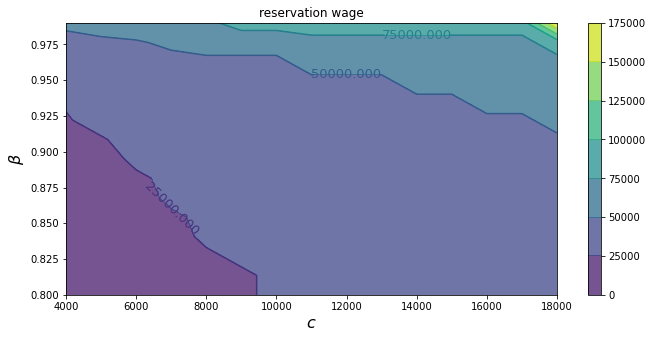

In [42]:
fig, ax = plt.subplots()

cs1 = ax.contourf(c_vals, Œ≤_vals, R.T, alpha=0.75)
ctr1 = ax.contour(c_vals, Œ≤_vals, R.T)

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)


ax.set_title("reservation wage")
ax.set_xlabel("$c$", fontsize=16)
ax.set_ylabel("$Œ≤$", fontsize=16)

ax.ticklabel_format(useOffset=False)

plt.show()

### 8) –¢—Ä–µ—Ö–º–µ—Ä–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Ä–µ–∑–µ—Ä–≤–Ω–æ–π –∑–∞—Ä–ø–ª–∞—Ç—ã –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —Ä–∞–∑–º–µ—Ä–∞ –ø–æ—Å–æ–±–∏—è

In [43]:
X = c_vals
Y = Œ≤_vals
X,Y = np.meshgrid(X,Y)

In [44]:
plot_3d = pd.DataFrame({'c':X.reshape(-1)})

In [45]:
plot_3d['Œ≤'] = Y.reshape(-1)
plot_3d['w'] = R.reshape(-1)
plot_3d

c     Œ≤         w
0     4000.0  0.80   14275.0
1     5000.0  0.80   15275.0
2     6000.0  0.80   15275.0
3     7000.0  0.80   16425.0
4     8000.0  0.80   17525.0
..       ...   ...       ...
220  14000.0  0.99   55000.0
221  15000.0  0.99   55000.0
222  16000.0  0.99   67500.0
223  17000.0  0.99   87500.0
224  18000.0  0.99  175000.0

[225 rows x 3 columns]

In [46]:
fig = px.scatter_3d(plot_3d, x='c', y="Œ≤", z="w")
fig.show()

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:

–†–∞–∑–º–µ—Ä —Ä–µ–∑–µ—Ä–≤–Ω–æ–π –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –∫–∞–∫ –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è, —Ç–∞–∫ –∏ –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –ø–æ—Å–æ–±–∏—è, –Ω–æ –≤—Ç–æ—Ä–æ–µ –≤–ª–∏—è–µ—Ç –Ω–∞–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ

–ö–∞–∫–∏–º –±—ã –≤–∞–∂–Ω—ã–º –Ω–∏ –±—ã–ª–æ –±—É–¥—É—â–µ–µ(–ø—Ä–∏ –≤—ã—Å–æ–∫–æ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–µ –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è) –º–∞–ª–µ–Ω—å–∫–æ–µ –ø–æ—Å–æ–±–∏–µ —Å–¥–µ–ª–∞–µ—Ç —Ä–µ–∑–µ—Ä–≤–Ω—É—é –∑–∞—Ä–ø–ª–∞—Ç—É –º–∞–ª–µ–Ω—å–∫–æ–π(–∏ –Ω–∞–æ–±–æ—Ä–æ—Ç)

### 9) –ì—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ä–µ–∑–µ—Ä–≤–Ω–æ–π –∑–∞—Ä–ø–ª–∞—Ç—ã –æ—Ç –¥–∏—Å–∫–æ–Ω—Ç-—Ñ–∞–∫—Ç–æ—Ä–∞, —Ä–∞–∑–º–µ—Ä–∞ –ø–æ—Å–æ–±–∏—è, –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —É–≤–æ–ª—å–Ω–µ–Ω–∏—è, –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ ùúé

–ú—ã –ø—Ä–∏–Ω–∏–º–∞–µ–º —Ä–µ—à–µ–Ω–∏–µ –æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω–æ–π –∑–ø, –∫–æ–≥–¥–∞ 

$w > \bar w$ , –≥–¥–µ $\bar w$ - —Ä–µ–∑–µ—Ä–≤–Ω–∞—è –∑–ø

$v(\bar w)$ =$u(c)$ + $\beta$ * $d$


–ü–∞—Ä–∞–º–µ—Ç—Ä –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –æ—Ç—Ä–∞–∂–∞–µ—Ç –Ω–∞—Å–∫–æ–ª—å–∫–æ –≤–∞–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –∑–∞—Ä–ø–ª–∞—Ç—É —Å–µ–π—á–∞—Å => 
 —á–µ–º –≤—ã—à–µ —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä,—Ç–µ–º –≤—ã—à–µ –æ–∂–∏–¥–∞–µ–º–∞—è —Ü–µ–Ω–Ω–æ—Å—Ç—å –æ—Ç–∫–∞–∑–∞



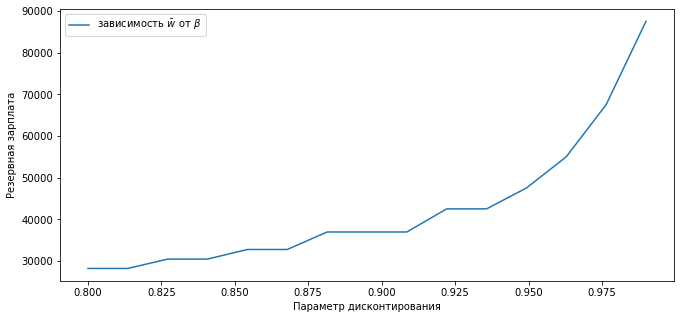

In [47]:
fig, ax = plt.subplots()

mcm = McCallModel()
w_bar_vals = np.empty_like(Œ≤_vals)

for i, Œ≤ in enumerate(Œ≤_vals):
    mcm.Œ≤ = Œ≤
    w_bar = compute_reservation_wage(mcm)
    w_bar_vals[i] = w_bar

ax.set(xlabel='–ü–∞—Ä–∞–º–µ—Ç—Ä –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è', ylabel='–†–µ–∑–µ—Ä–≤–Ω–∞—è –∑–∞—Ä–ø–ª–∞—Ç–∞')
ax.plot(Œ≤_vals, w_bar_vals, label=r'–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å $\bar w$ –æ—Ç $\beta$')
ax.legend()
print('')
print('–ü–∞—Ä–∞–º–µ—Ç—Ä –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –æ—Ç—Ä–∞–∂–∞–µ—Ç –Ω–∞—Å–∫–æ–ª—å–∫–æ –≤–∞–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –∑–∞—Ä–ø–ª–∞—Ç—É —Å–µ–π—á–∞—Å => \n —á–µ–º –≤—ã—à–µ —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä,—Ç–µ–º –≤—ã—à–µ –æ–∂–∏–¥–∞–µ–º–∞—è —Ü–µ–Ω–Ω–æ—Å—Ç—å –æ—Ç–∫–∞–∑–∞')
print('')
plt.show()



–û–∂–∏–¥–∞–µ–º–∞—è —Ü–µ–Ω–Ω–æ—Å—Ç—å –æ—Ç–∫–∞–∑–∞ —Ç–∞–∫–∂–µ –±—É–¥–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –∏ –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –ø–æ—Å–æ–±–∏—è, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–µ–¥–ª–∞–≥–∞—é—Ç



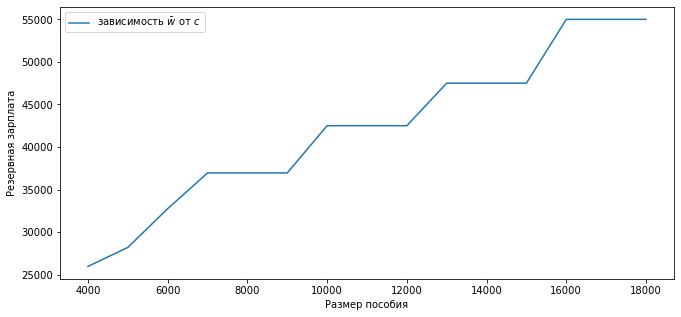

In [48]:
fig, ax = plt.subplots()

mcm = McCallModel(Œ≤ = beta)
w_bar_vals = np.empty_like(c_vals)

for i, c in enumerate(c_vals):
    mcm.c = c
    w_bar = compute_reservation_wage(mcm)
    w_bar_vals[i] = w_bar

ax.set(xlabel='–†–∞–∑–º–µ—Ä –ø–æ—Å–æ–±–∏—è',
       ylabel='–†–µ–∑–µ—Ä–≤–Ω–∞—è –∑–∞—Ä–ø–ª–∞—Ç–∞')
ax.plot(c_vals, w_bar_vals, label=r'–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å $\bar w$ –æ—Ç $—Å$')
ax.legend()

print('')
print('–û–∂–∏–¥–∞–µ–º–∞—è —Ü–µ–Ω–Ω–æ—Å—Ç—å –æ—Ç–∫–∞–∑–∞ —Ç–∞–∫–∂–µ –±—É–¥–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –∏ –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –ø–æ—Å–æ–±–∏—è, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–µ–¥–ª–∞–≥–∞—é—Ç')
print('')
plt.show()

plt.show()

In [49]:
fig, ax = plt.subplots()

mcm = McCallModel(Œ≤ = beta)
alpha_vals = np.linspace(0.05, 0.5, grid_size)
w_bar_vals = np.empty_like(alpha_vals)

for i, Œ± in enumerate(alpha_vals):
    mcm.Œ± = Œ±
    w_bar = compute_reservation_wage(mcm)
    w_bar_vals[i] = w_bar

ax.set(xlabel='–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É–≤–æ–ª—å–Ω–µ–Ω–∏—è', ylabel='–†–µ–∑–µ—Ä–≤–Ω–∞—è –∑–∞—Ä–ø–ª–∞—Ç–∞')
ax.plot(alpha_vals, w_bar_vals, label=r'–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å $\bar w$ –æ—Ç $\alpha$')
ax.legend()

print('')
print('–° –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —É–≤–æ–ª—å–Ω–µ–Ω–∏—è –ø–∞–¥–∞–µ—Ç —Ü–µ–Ω–Ω–æ—Å—Ç—å –≤—ã—Å–æ–∫–æ–π –∑–∞—Ä–ø–ª–∞—Ç—ã')
print('')

plt.show()


–° –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —É–≤–æ–ª—å–Ω–µ–Ω–∏—è –ø–∞–¥–∞–µ—Ç —Ü–µ–Ω–Ω–æ—Å—Ç—å –≤—ã—Å–æ–∫–æ–π –∑–∞—Ä–ø–ª–∞—Ç—ã




–ë–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∑–∞—Ä–ø–ª–∞—Ç—ã –≤ –±—É–¥—É—â–µ–º —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –º–µ–Ω–µ–µ –ø—Ä–∏–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–º–∏ –ø—Ä–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏–∏ —Å–∏–≥–º—ã
*–≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –Ω–∞–ø—Ä—è–º—É—é –æ–∑–Ω–∞—á–∞–µ—Ç —Å–Ω–∏–∂–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ–ª–µ–∑–Ω–æ—Å—Ç–∏



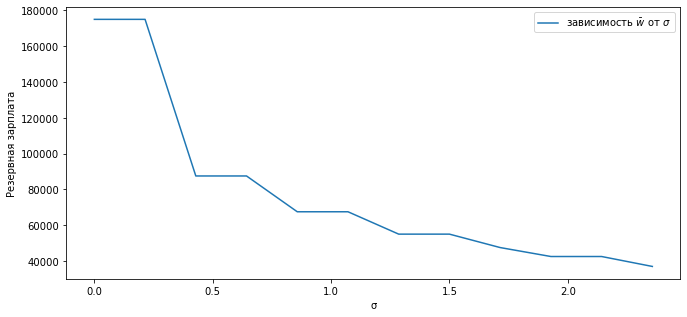

In [50]:
fig, ax = plt.subplots()


œÉ_vals = np.linspace(0, 3, 15)
w_bar_vals = np.empty_like(œÉ_vals)

for i, j in enumerate(œÉ_vals):
    mcm = McCallModel(œÉ = j, Œ≤ = beta)
    w_bar = compute_reservation_wage(mcm,œÉ = j)
    w_bar_vals[i] = w_bar

ax.set(xlabel='œÉ', ylabel='–†–µ–∑–µ—Ä–≤–Ω–∞—è –∑–∞—Ä–ø–ª–∞—Ç–∞')
ax.plot(œÉ_vals, w_bar_vals, label=r'–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å $\bar w$ –æ—Ç $œÉ$')
ax.legend()

print('')
print('–ë–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∑–∞—Ä–ø–ª–∞—Ç—ã –≤ –±—É–¥—É—â–µ–º —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –º–µ–Ω–µ–µ –ø—Ä–∏–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–º–∏ –ø—Ä–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏–∏ —Å–∏–≥–º—ã')
print('*–≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –Ω–∞–ø—Ä—è–º—É—é –æ–∑–Ω–∞—á–∞–µ—Ç —Å–Ω–∏–∂–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ–ª–µ–∑–Ω–æ—Å—Ç–∏')
print('')

plt.show()